In [6]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../../')
from paths import *

# this environmental variable must be set <before> the BID imports, to work with JAX double-precision
os.environ["JAX_ENABLE_X64"] = "True"
from dadapy.hamming import *

geometry = 'Ising-square'
datafolder = f'/scratch/sacevedo/{geometry}/canonical/'

T=2.30
Ns=2000
Ns=3000
Ns=4000
Ns=5000
T=2.00
Ns=2000
Ns=3000
Ns=4000
Ns=5000
T=3.00
Ns=2000
Ns=3000
Ns=4000
Ns=5000


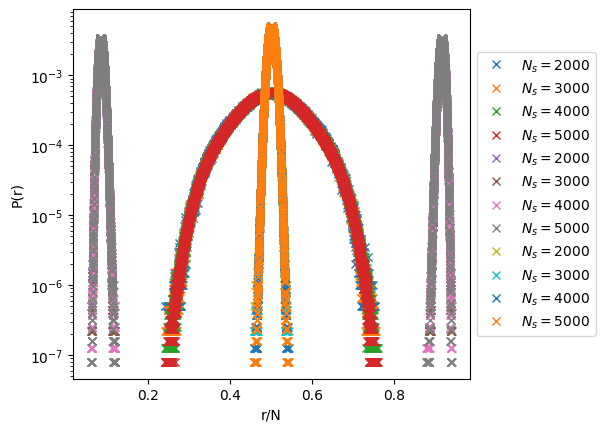

In [11]:
figh,axh = plt.subplots(1)
T_list = np.flip(np.array([3,2,2.3])) # temperature list
L = 100  # system width or height (you can see size-differences putting here L=30)
N = L**2 # total number of spins in a two-dimensional square lattice of length L 
Ns_list = np.arange(2000,5000+1,1000,dtype=int) # number of samples for each temperature

for T_id,T in enumerate(T_list):
  print(f'{T=:.2f}')
  for Ns_id,Ns in enumerate(Ns_list):
    print(f'{Ns=}')
    histfolder = f'results/hist/L{L}/T{T:.2f}/Ns{Ns}/'
    datafile = datafolder + f'L{L}/T{T:.2f}.txt'
    X = np.loadtxt(f'{datafile}').astype(int)[:Ns]
    H = Hamming(coordinates=X)
    H.compute_distances()
    H.D_histogram(compute_flag=1,            # if 0 the histograms are loaded instead of computed
                  save=True,                 # we compute the histograms once and save time in the future
                  resultsfolder=histfolder,  # folder where the histograms are saved
                  )
    axh.plot(H.D_values/N,
            H.D_probs,
            'x',
            label= r'$N_s=$' + f'{Ns}',
            )

axh.set_yscale('log')
box = axh.get_position()
axh.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axh.legend(loc='center left', bbox_to_anchor=(1, 0.5))

axh.set_xlabel('r/N')
axh.set_ylabel('P(r)')
# plt.title(f'2D Ising model with {L=}')
plt.show()